In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [4]:
car=pd.read_csv(r"C:\Users\laksh\Downloads\quikr_car.csv")

In [5]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [6]:
car.shape

(892, 6)

In [7]:
car.info

<bound method DataFrame.info of                                        name    company  year          Price  \
0      Hyundai Santro Xing XO eRLX Euro III    Hyundai  2007         80,000   
1                   Mahindra Jeep CL550 MDI   Mahindra  2006       4,25,000   
2                Maruti Suzuki Alto 800 Vxi     Maruti  2018  Ask For Price   
3    Hyundai Grand i10 Magna 1.2 Kappa VTVT    Hyundai  2014       3,25,000   
4          Ford EcoSport Titanium 1.5L TDCi       Ford  2014       5,75,000   
..                                      ...        ...   ...            ...   
887                                      Ta       Tara  zest       3,10,000   
888                     Tata Zest XM Diesel       Tata  2018       2,60,000   
889                      Mahindra Quanto C8   Mahindra  2013       3,90,000   
890                Honda Amaze 1.2 E i VTEC      Honda  2014       1,80,000   
891               Chevrolet Sail 1.2 LT ABS  Chevrolet  2014       1,60,000   

     kms_driven fue

In [8]:
#CREATING BACKUP COPY

backup=car.copy()

In [9]:
#CLEANING DATA

car=car[car['year'].str.isnumeric()]

In [10]:
car=car[car['Price']!='Ask For Price']
car['Price']=car['Price'].str.replace(',','').astype(int)
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')
car=car[car['kms_driven'].str.isnumeric()]
car['kms_driven']=car['kms_driven'].astype(int)
car['kms_driven']=car['kms_driven'].astype(int)

In [11]:
car.shape

(817, 6)

In [12]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')
car=car.reset_index(drop=True)

In [13]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
812,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
813,Tata Indica V2,Tata,2009,110000,30000,Diesel
814,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
815,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [14]:
car.to_csv('Cleaned_Car_data.csv')

In [15]:
car.info

<bound method DataFrame.info of                        name   company  year   Price  kms_driven fuel_type
0       Hyundai Santro Xing   Hyundai  2007   80000       45000    Petrol
1       Mahindra Jeep CL550  Mahindra  2006  425000          40    Diesel
2         Hyundai Grand i10   Hyundai  2014  325000       28000    Petrol
3    Ford EcoSport Titanium      Ford  2014  575000       36000    Diesel
4                 Ford Figo      Ford  2012  175000       41000    Diesel
..                      ...       ...   ...     ...         ...       ...
812      Maruti Suzuki Ritz    Maruti  2011  270000       50000    Petrol
813          Tata Indica V2      Tata  2009  110000       30000    Diesel
814    Toyota Corolla Altis    Toyota  2009  300000      132000    Petrol
815            Tata Zest XM      Tata  2018  260000       27000    Diesel
816      Mahindra Quanto C8  Mahindra  2013  390000       40000    Diesel

[817 rows x 6 columns]>

In [16]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,817,817,817,8.170000e+02,817.000000,816
unique,254,25,21,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,2015,NaN,NaN,Petrol
freq,51,221,111,NaN,NaN,428
mean,NaN,NaN,NaN,4.115503e+05,46250.714810,NaN
std,NaN,NaN,NaN,4.749173e+05,34283.745254,NaN
min,NaN,NaN,NaN,3.000000e+04,0.000000,NaN
25%,NaN,NaN,NaN,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,NaN,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,NaN,4.900000e+05,56758.000000,NaN


In [17]:
car=car[car['Price']<6000000]

In [18]:
#CHECKING RELATIONSHIP WITH PRICE

car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [19]:
#VISUALIZATION

import seaborn as sns

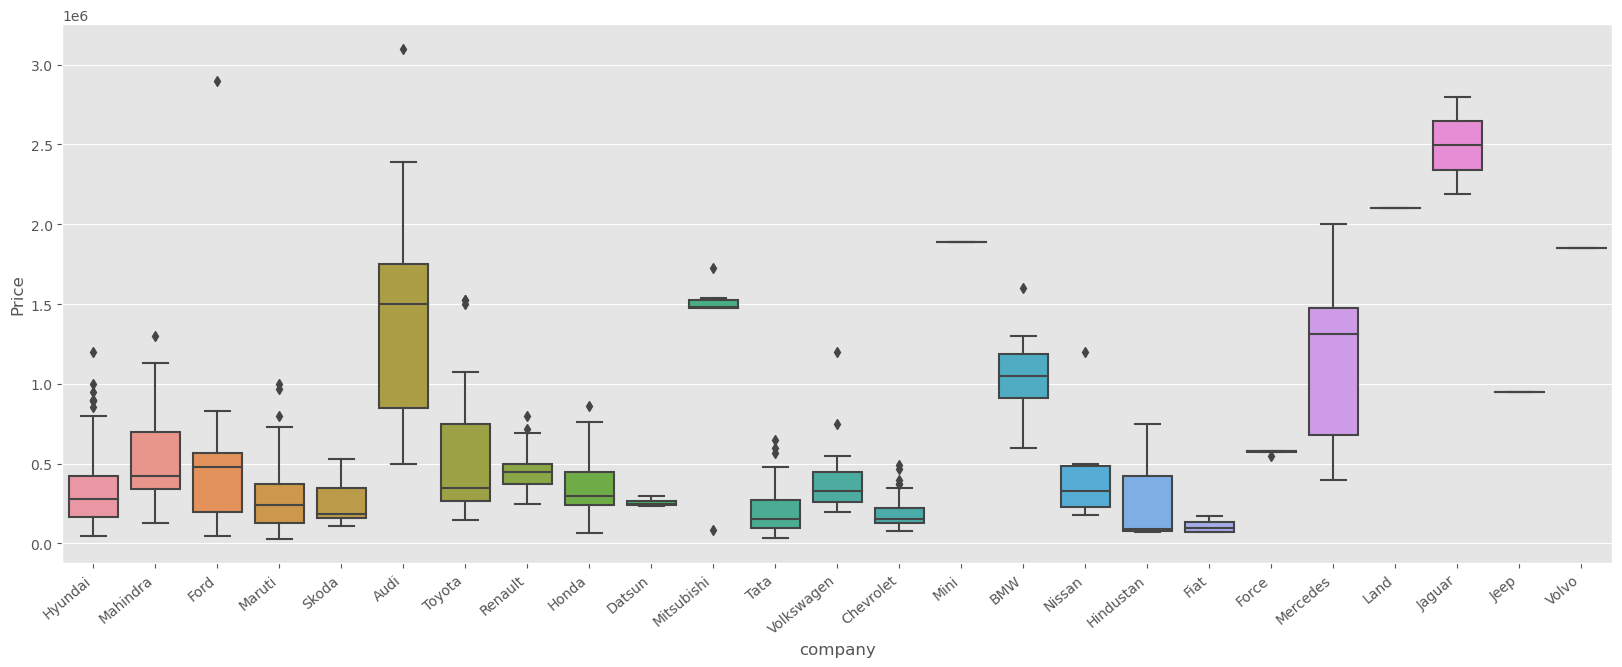

In [20]:
plt.subplots(figsize=(20,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

C:\Users\laksh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


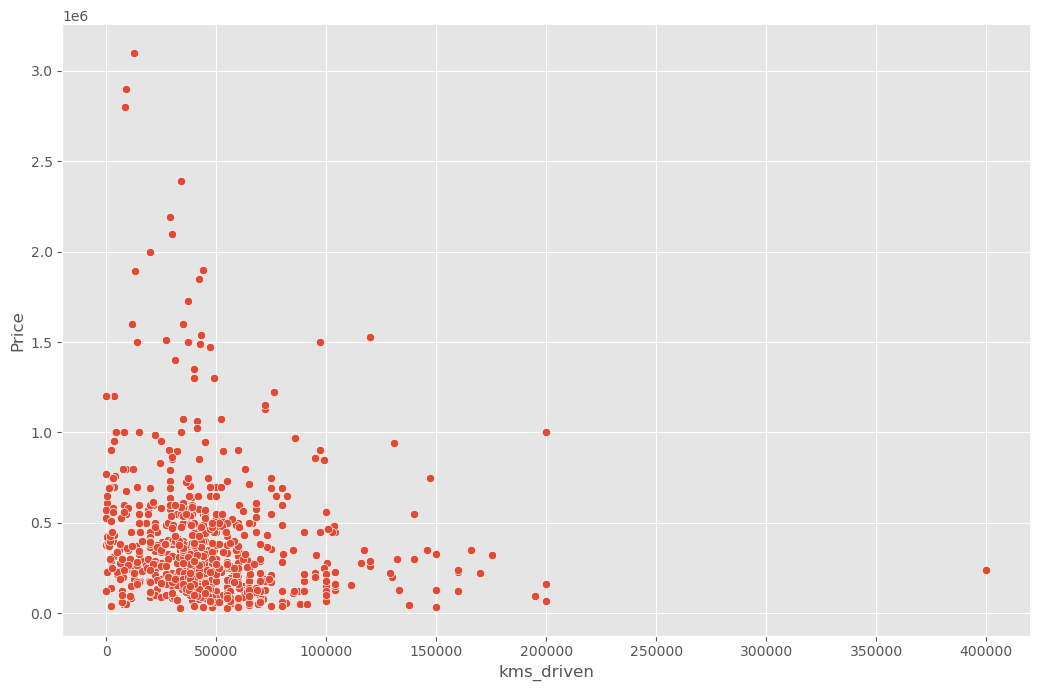

In [21]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

<Axes: xlabel='fuel_type', ylabel='Price'>

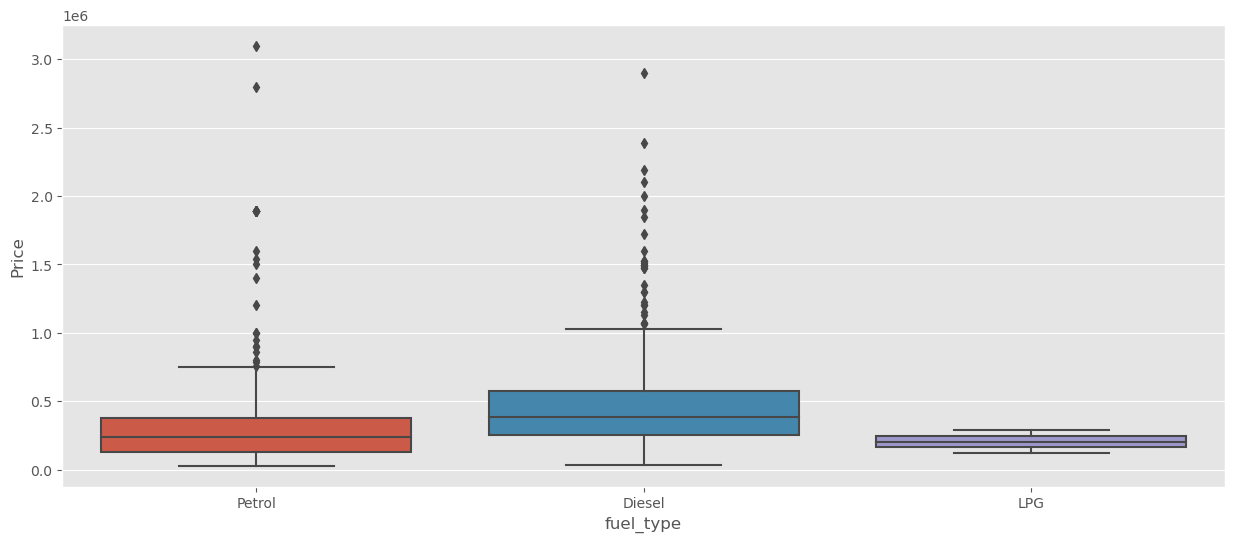

In [22]:
plt.subplots(figsize=(15,6))
sns.boxplot(x='fuel_type',y='Price',data=car)

C:\Users\laksh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


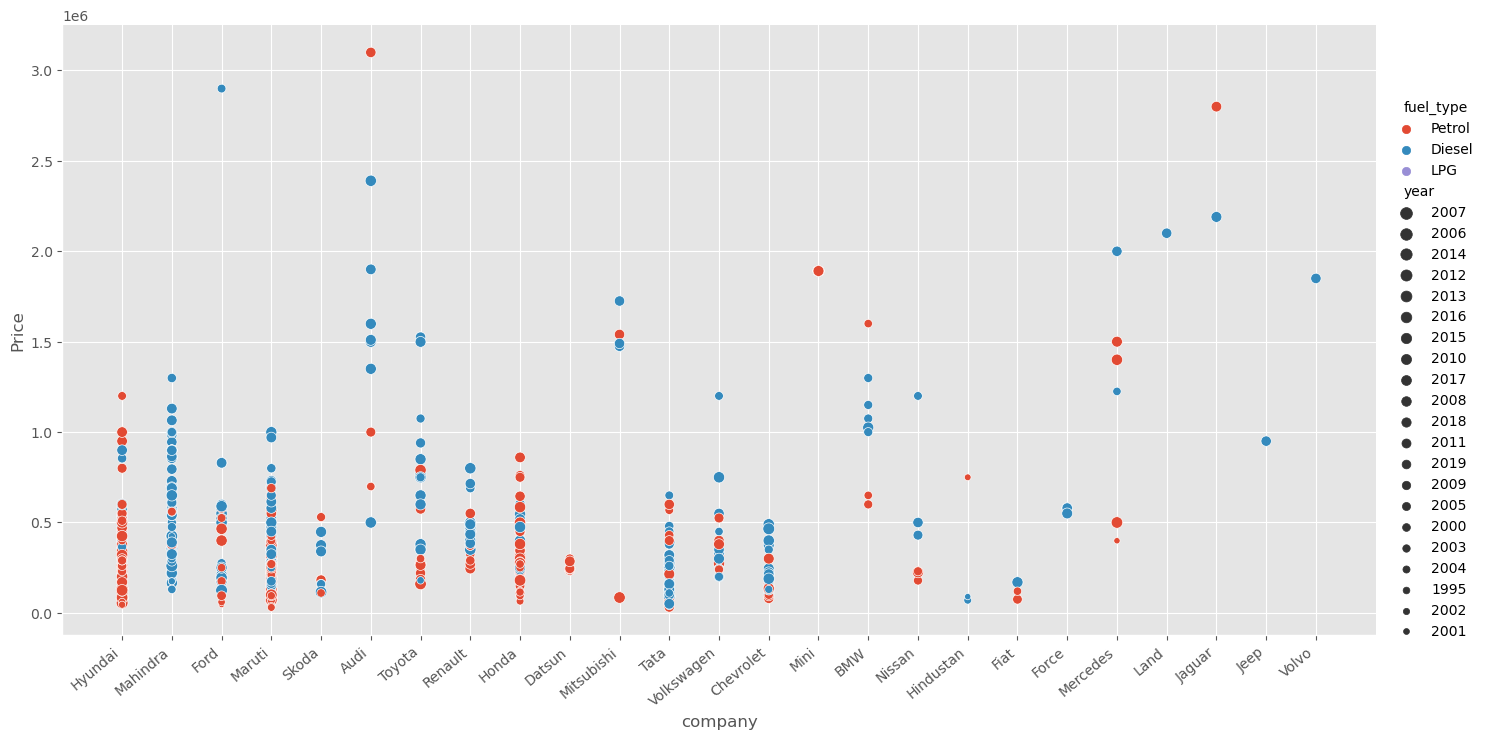

In [23]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [24]:
#TRAINING DATA

X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
812,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
813,Tata Indica V2,Tata,2009,30000,Diesel
814,Toyota Corolla Altis,Toyota,2009,132000,Petrol
815,Tata Zest XM,Tata,2018,27000,Diesel


In [25]:
y.shape

(816,)

In [26]:
#TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [27]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [28]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [29]:
lr=LinearRegression()

In [30]:
pipe=make_pipeline(column_trans,lr)

In [31]:
#FITTING THE MODEL

pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol', nan], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [32]:
y_pred=pipe.predict(X_test)

In [33]:
#R2 SCORE

r2_score(y_test,y_pred)

0.5029532576775564

In [ ]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [ ]:
scores[np.argmax(scores)]

In [ ]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

In [ ]:
import pickle

In [ ]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [ ]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

In [50]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese